<a href="https://colab.research.google.com/github/gisellerosendo24/challenge2-data-science-LATAM/blob/main/Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**📌Extracción**

###**Extracción de datos**

In [ ]:
#importamos los programas necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
IPython_default = plt.rcParams.copy()
plt.rcParams.update(IPython_default);
plt.style.use('ggplot')

In [ ]:
#extraemos los datos de un archivo .json
data = pd.read_json('TelecomX_Data.json')


##**🔧Transformación**

###**Conociendo el conjunto de datos**

In [ ]:
data.shape

(7267, 6)

In [ ]:
data.sample(5)

,customerID,Churn,customer,phone,internet,account
6227,8565-HBFNN,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
2208,3086-RUCRN,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5291,7233-IOQNP,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5990,8189-DUKMV,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'One year', 'PaperlessBilling': '..."
5290,7233-DRTRF,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
data.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


###**Comprobando incoherencias en los datos**

In [ ]:
#visualizamos las primeras 5 columnas del nuevo dataframe
data.head(5)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
#buscamos los valores nulos
data.isna().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
data['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


###**Manejo de inconsistencias**

In [ ]:
#extraemos la informacion comprimida en las columnas
customer_df = pd.json_normalize(data['customer'])
phone_df = pd.json_normalize(data['phone'])
internet_df = pd.json_normalize(data['internet'])
account_df = pd.json_normalize(data['account'])

# Concatenate the flattened dataframes with the original dataframe
data = pd.concat([data[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

data.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
#modificamos el tipo de valor en la columna
data['Charges.Total'] = data['Charges.Total'].replace(' ', np.nan)
data['Charges.Total'] = data['Charges.Total'].astype(float)

In [ ]:
data = data.dropna(axis=0,inplace=False)

In [ ]:
#comprobamos la eliminacion de valores nulos
data.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [ ]:
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [ ]:
data.shape

(7256, 21)

In [ ]:
data.customerID.nunique()

7256

In [ ]:
data['Churn'] = data['Churn'].astype(str).str.strip().str.lower()
data['Partner'] = data['Partner'].astype(str).str.strip().str.lower()
data['Dependents'] = data['Dependents'].astype(str).str.strip().str.lower()
data['PhoneService'] = data['PhoneService'].astype(str).str.strip().str.lower()
data['PaperlessBilling'] = data['PaperlessBilling'].astype(str).str.strip().str.lower()

/tmp/ipython-input-320-3775448049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].astype(str).str.strip().str.lower()
/tmp/ipython-input-320-3775448049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Partner'] = data['Partner'].astype(str).str.strip().str.lower()
/tmp/ipython-input-320-3775448049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
data['Churn'].value_counts()

,count
Churn,
no,5163
yes,1869
,224


In [ ]:
data['Churn'] = data['Churn'].replace(r'^\s*$', np.nan, regex=True)

/tmp/ipython-input-322-1891298231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].replace(r'^\s*$', np.nan, regex=True)


In [ ]:
data['Churn'].value_counts()

,count
Churn,
no,5163
yes,1869


###**Columna de cuentas diarias**

In [ ]:
data['Cuentas_diarias'] = data['Charges.Monthly'] / 30


In [ ]:
data.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,no,Female,0,yes,yes,9,yes,No,DSL,...,No,Yes,Yes,No,One year,yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,Male,0,no,no,9,yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,no,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,Male,0,no,no,4,yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,Male,1,yes,no,13,yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,Female,1,yes,no,3,yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,yes,Mailed check,83.9,267.40,2.796667


In [ ]:
suscripciones = ['MultipleLines','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']



In [ ]:
data['Tiene_suscripcion'] = data[suscripciones].apply(
    lambda row: 'Activa' if 'Yes' in row.values else 'Inactiva', axis=1)


###**Estandarización y transformación de datos**

In [ ]:
data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2866
Yes,2815
No internet service,1575


In [ ]:
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_diarias', 'Tiene_suscripcion'],
      dtype='object')

In [ ]:
data['Partner'] = data['Partner'].apply(lambda x: 1 if x == 'yes' else 0)
data['Dependents'] = data['Dependents'].apply(lambda x: 1 if x == 'yes' else 0)
data['PhoneService'] = data['PhoneService'].apply(lambda x: 1 if x == 'yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].apply(lambda x: 1 if x == 'yes' else 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias,Tiene_suscripcion
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,Activa
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,Activa
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Activa
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,Activa
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,Activa


In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5387
1,1869


In [ ]:
data.rename(columns={'Charges.Monthly': 'Charges_monthly', 'Charges.Total': 'Charges_total'}, inplace=True)

In [ ]:
data.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_monthly,Charges_total,Cuentas_diarias,Tiene_suscripcion
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667,Activa
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667,Activa
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Activa
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,Activa
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667,Activa


##**📊Carga y analisis**

###**Análisis descriptivo**

In [ ]:
data.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


###**Distribución de evasión**

In [ ]:
data['Churn'].value_counts()

,count
Churn,
0,5387
1,1869


###**Recuento de evasión por variables categóricas**

In [ ]:
data['evasion_por_genero'] = data.groupby('gender')['Churn'].transform('sum')
evasion_por_genero = data.groupby('gender')['evasion_por_genero'].first()
evasion_por_genero

,evasion_por_genero
gender,
Female,939
Male,930


In [ ]:
data['evasion_contrato']=data.groupby('Contract')['Churn'].transform('sum')
evasion_contrato=data.groupby('Contract')['evasion_contrato'].first()
evasion_contrato

,evasion_contrato
Contract,
Month-to-month,1655
One year,166
Two year,48


In [ ]:
data['evasion_metodo_pago']=data.groupby('PaymentMethod')['Churn'].transform('sum')
evasion_metodo_pago=data.groupby('PaymentMethod')['evasion_metodo_pago'].first()
evasion_metodo_pago


,evasion_metodo_pago
PaymentMethod,
Bank transfer (automatic),258
Credit card (automatic),232
Electronic check,1071
Mailed check,308


In [ ]:
data['evasion_citizen']=data.groupby('SeniorCitizen')['Churn'].transform('sum')
evasion_citizen=data.groupby('SeniorCitizen')['evasion_citizen'].first()
evasion_citizen

,evasion_citizen
SeniorCitizen,
0,1393
1,476


In [ ]:
data['evasion_partner']=data.groupby('Partner')['Churn'].transform('sum')
evasion_partner=data.groupby('Partner')['evasion_partner'].first()
evasion_partner

,evasion_partner
Partner,
0,1200
1,669


In [ ]:
data['evasion_dependents']=data.groupby('Dependents')['Churn'].transform('sum')
evasion_dependents=data.groupby('Dependents')['evasion_dependents'].first()
evasion_dependents


,evasion_dependents
Dependents,
0,1543
1,326


In [ ]:
data['evasion_phoneservice']=data.groupby('PhoneService')['Churn'].transform('sum')
evasion_phoneservice=data.groupby('PhoneService')['evasion_phoneservice'].first()
evasion_phoneservice

,evasion_phoneservice
PhoneService,
0,170
1,1699


In [ ]:
data['evasion_internet_service']=data.groupby('InternetService')['Churn'].transform('sum')
evasion_internet_service=data.groupby('InternetService')['evasion_internet_service'].first()
evasion_internet_service

,evasion_internet_service
InternetService,
DSL,459
Fiber optic,1297
No,113


In [ ]:
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_monthly', 'Charges_total',
       'Cuentas_diarias', 'Tiene_suscripcion', 'evasion_por_genero',
       'evasion_contrato', 'evasion_metodo_pago', 'evasion_citizen',
       'evasion_partner', 'evasion_dependents', 'evasion_phoneservice',
       'evasion_internet_service'],
      dtype='object')

In [ ]:
data['evasion_suscripcion']=data.groupby('Tiene_suscripcion')['Churn'].transform('sum')
evasion_suscripcion=data.groupby('Tiene_suscripcion')['evasion_suscripcion'].first()
evasion_suscripcion

,evasion_suscripcion
Tiene_suscripcion,
Activa,1523
Inactiva,346


###**Conteo de evasión por variables numéricas**

In [ ]:
data['grupo_tiempo'] = data['tenure'].apply(lambda x: '<1 año' if x < 12 else '>1año')

In [ ]:
data['evasion_tiempo']= data.groupby('grupo_tiempo')['Churn'].transform('sum')
evasion_tiempo=data.groupby('grupo_tiempo')['evasion_tiempo'].first()
evasion_tiempo


,evasion_tiempo
grupo_tiempo,
<1 año,999
>1año,870


In [ ]:
data['Charges_total'].describe()

,Charges_total
count,7256.000000
mean,2280.634213
std,2268.632997
min,18.800000
25%,400.225000
50%,1391.000000
75%,3785.300000
max,8684.800000


In [ ]:
data['grupo_mensual'] = data['Charges_monthly'].apply(lambda x: '<100' if x < 100.0 else '>100')

In [ ]:
data['evasion_mensual']= data.groupby('grupo_mensual')['Churn'].transform('sum')
evasion_mensual=data.groupby('grupo_mensual')['evasion_mensual'].first()
evasion_mensual

,evasion_mensual
grupo_mensual,
<100,1612
>100,257


In [ ]:
data['grupo_gastado'] = data['Charges_total'].apply(lambda x: '<2000' if x < 2000 else '>2000')

In [ ]:
data['evasion_gasto_total']= data.groupby('grupo_gastado')['Churn'].transform('sum')
evasion_total=data.groupby('grupo_gastado')['evasion_gasto_total'].first()
evasion_total

,evasion_gasto_total
grupo_gastado,
<2000,1339
>2000,530


##**📄Informe final**



**1.   Objetivo del análisis**

  El presente análisis tiene como objetivo identificar las principales causas del incremento en la evasión de clientes de la empresa Telecom, con el fin de proponer estrategias que permitan mejorar la retención de usuarios.


**2.   Calidad y tratamiento de los datos**

  Durante la revisión inicial del conjunto de datos, se detectaron inconsistencias en la visualización del DataFrame, así como la presencia de valores nulos. Se procedió a realizar una limpieza exhaustiva, tratamiento y validación de los datos, asegurando así su calidad para el análisis posterior.

**3.  Análisis exploratorio de datos (EDA)**

  En la fase de análisis exploratorio se identificaron relaciones relevantes entre variables, las cuales fueron evaluadas y representadas gráficamente.

  **Hallazgos principales:**
   

  *   El 25% del total de usuarios ha prescindido del servicio de Telecom.

  *   No se encontró una relación significativa con el género del cliente.

  *   Se observaron patrones comunes entre los clientes que han abandonado el servicio:

  *   Tipo de contrato: Predominantemente contratos mensuales.

  *   Método de pago: Principalmente cheque electrónico.

  *   Edad: Menores de 65 años.

  *   Estado civil y familia: Solteros, sin dependientes.

  *   Servicios contratados: Cuentan con servicio telefónico y fibra óptica.

  *   Suscripciones: Poseen al menos una suscripción activa.

  *   Antigüedad: Inferior a un año como clientes.

  *   Gasto mensual: Inferior a $100 USD.

**4.  Conclusiones**

  El perfil más común del cliente que ha abandonado el servicio incluye:

  *   Contrato mensual.
  *   Pago por cheque electrónico.
  *   Bajo compromiso (antigüedad y gasto mensual bajos).
  *   Uso de servicios básicos sin integración de múltiples productos.



**5.   Recomendaciones estratégicas**

  Con base en los hallazgos anteriores, se proponen las siguientes acciones para mejorar la retención de clientes:

  *  **Fomentar contratos de mayor duración** (anuales o bianuales), ofreciendo beneficios exclusivos frente al contrato mensual.
  *  **Diseñar paquetes integrados de servicios** (internet y telefonía) que ofrezcan descuentos o beneficios adicionales por contratar ambos.
  *  **Ofrecer promociones y pruebas gratuitas** de servicios adicionales para usuarios que actualmente cuentan con un único servicio.
  *  **Segmentar campañas** enfocadas en clientes nuevos y de bajo consumo para aumentar su fidelización en los primeros meses.

**6. Próximos pasos**

  
  *  Implementar un modelo de predicción de evasión basado en las variables identificadas.

  *  Realizar pruebas A/B para evaluar la efectividad de las estrategias de retención propuestas.

  *  Continuar con el monitoreo periódico del comportamiento de los clientes.







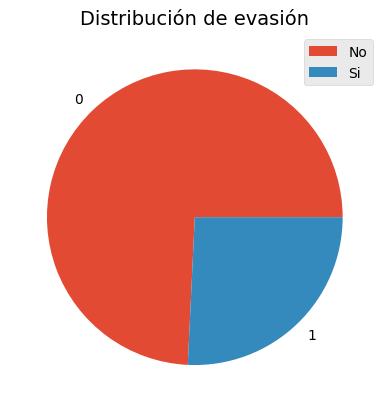

In [ ]:
data['Churn'].value_counts().plot(kind='pie')
plt.title('Distribución de evasión',size=14,loc='center')
plt.xlabel('')
plt.ylabel('')
plt.legend(['No','Si'])
plt.show()

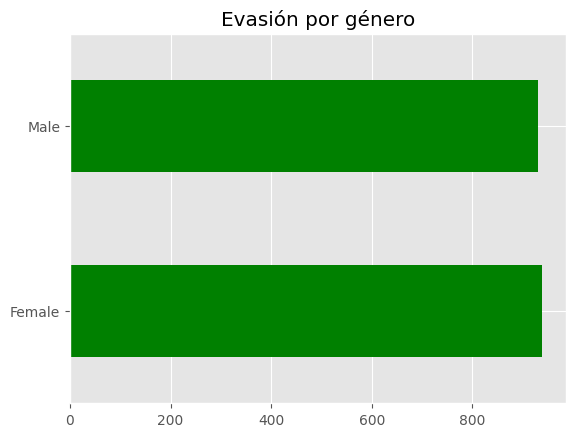

In [ ]:
evasion_por_genero.plot(kind='barh',color='green')
plt.title('Evasión por género')
plt.xlabel('')
plt.ylabel('')
plt.show()



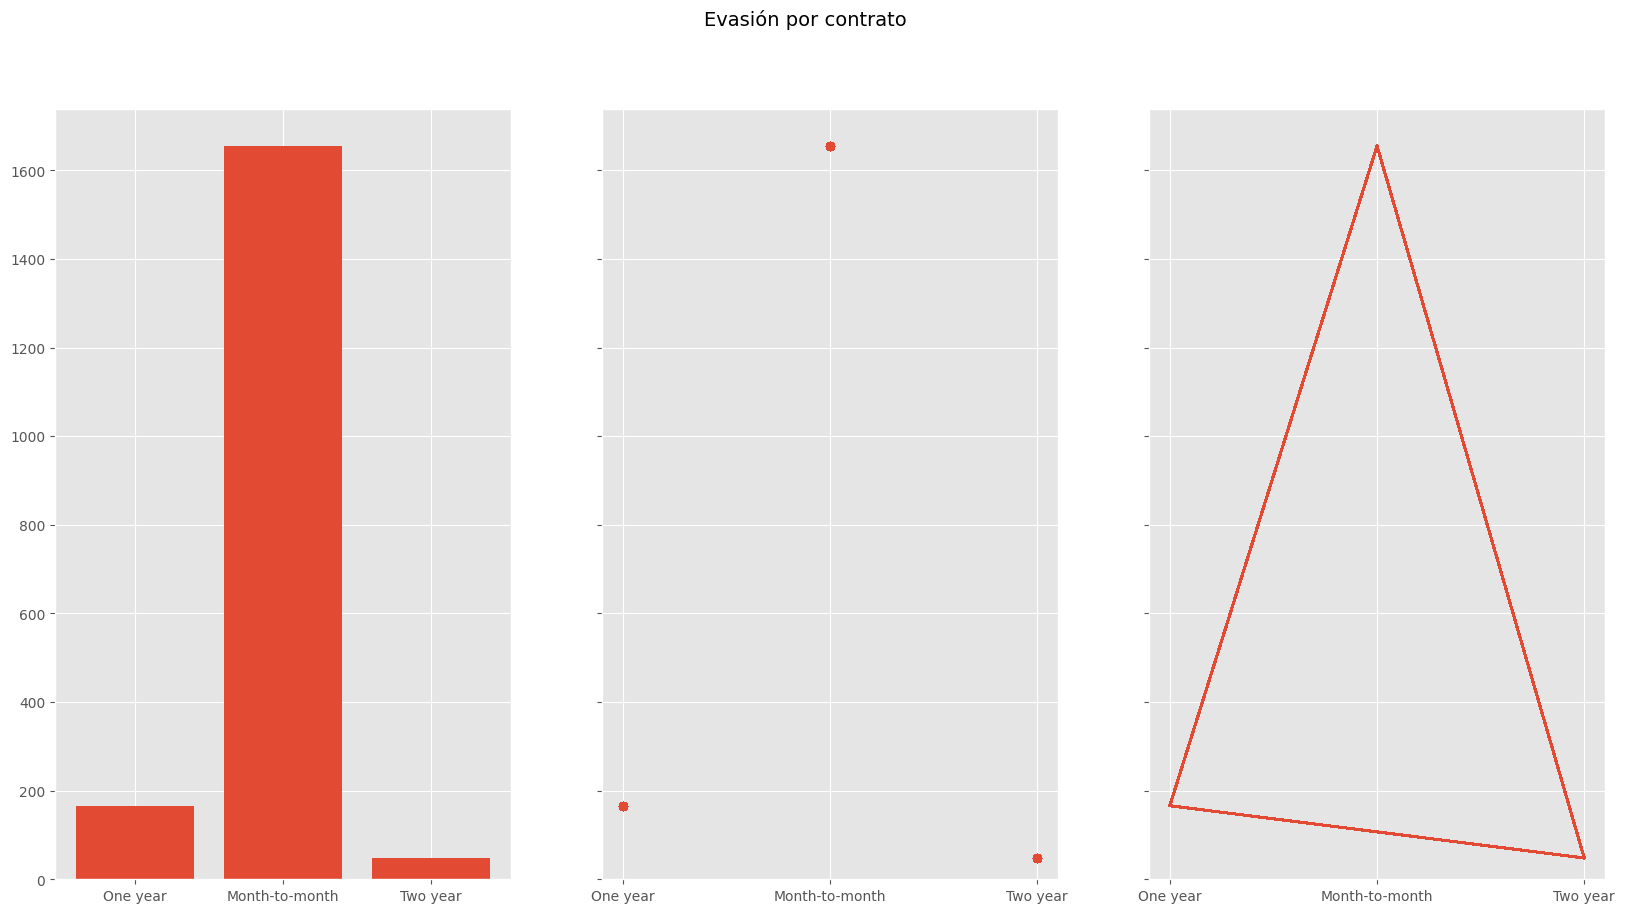

In [ ]:

contrato = data['Contract']
evasion = data['evasion_contrato']

fig, axs = plt.subplots(1, 3, figsize=(20, 10), sharey=True)
axs[0].bar(contrato,evasion)
axs[1].scatter(contrato, evasion)
axs[2].plot(contrato, evasion)
fig.suptitle('Evasión por contrato',size=14)
plt.show()

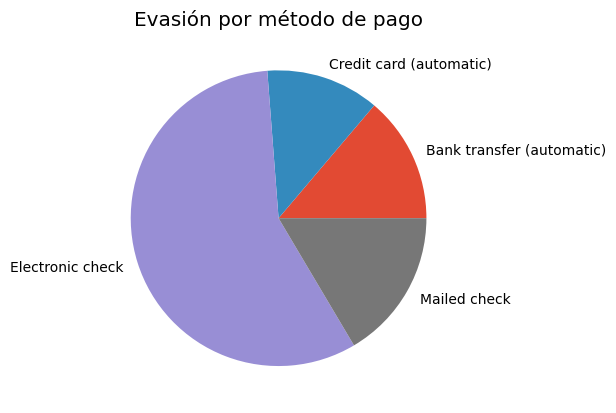

In [ ]:
evasion_metodo_pago.plot(kind='pie',color='tomato')
plt.title('Evasión por método de pago')
plt.xlabel('')
plt.ylabel('')
plt.show()

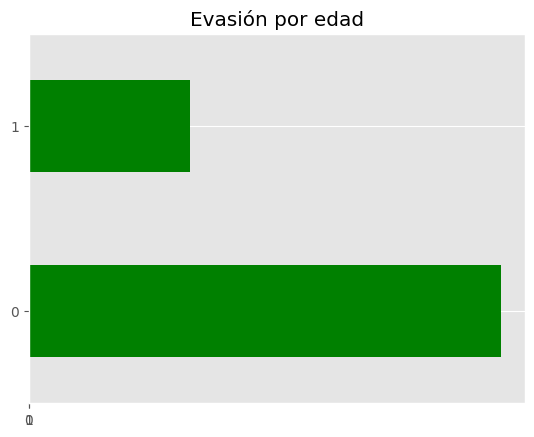

In [ ]:
evasion_citizen.plot(kind='barh',color='green')
plt.title('Evasión por edad')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1])
plt.show()


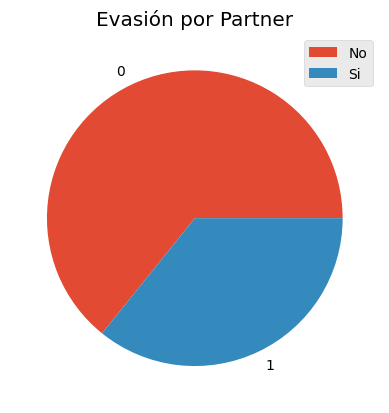

In [ ]:
evasion_partner.plot(kind='pie',color='tomato')
plt.title('Evasión por Partner')
plt.xlabel('')
plt.ylabel('')
plt.legend(['No','Si'])
plt.show()

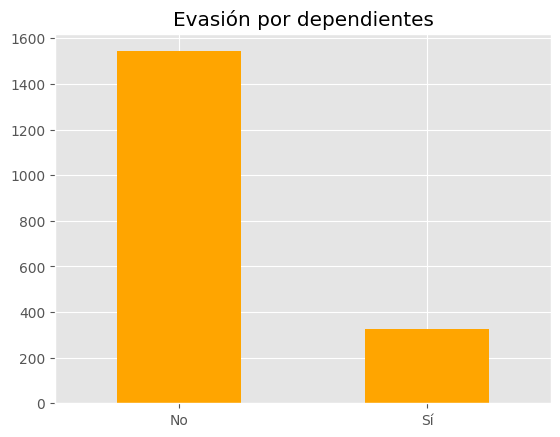

In [ ]:
evasion_dependents.plot(kind='bar',color='orange')
plt.title('Evasión por dependientes')
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.show()

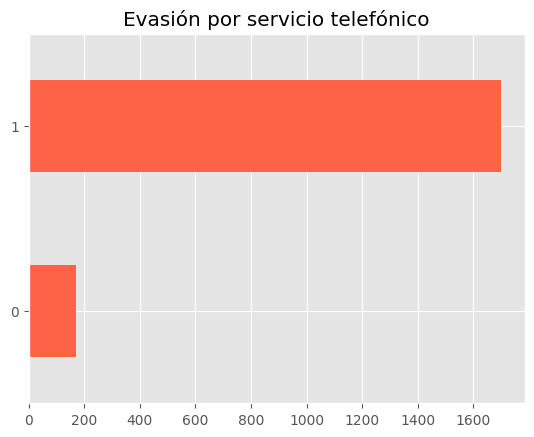

In [ ]:
evasion_phoneservice.plot(kind='barh',color='tomato')
plt.title('Evasión por servicio telefónico')
plt.xlabel('')
plt.ylabel('')
plt.show()

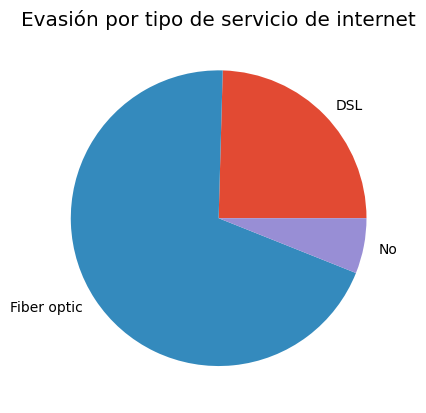

In [ ]:
evasion_internet_service.plot(kind='pie',color='tomato')
plt.title('Evasión por tipo de servicio de internet')
plt.xlabel('')
plt.ylabel('')
plt.show()

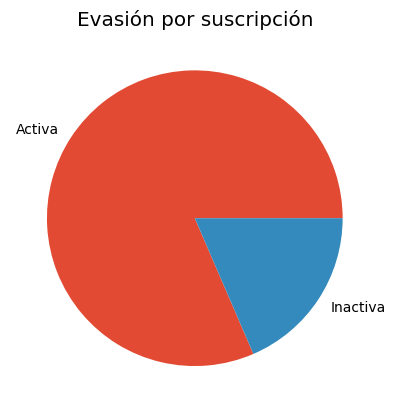

In [ ]:
evasion_suscripcion.plot(kind='pie',color='tomato')
plt.title('Evasión por suscripción')
plt.xlabel('')
plt.ylabel('')
plt.show()


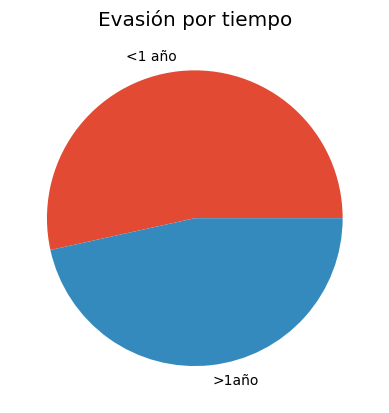

In [ ]:
evasion_tiempo.plot(kind='pie',color='tomato')
plt.title('Evasión por tiempo')
plt.xlabel('')
plt.ylabel('')
plt.show()

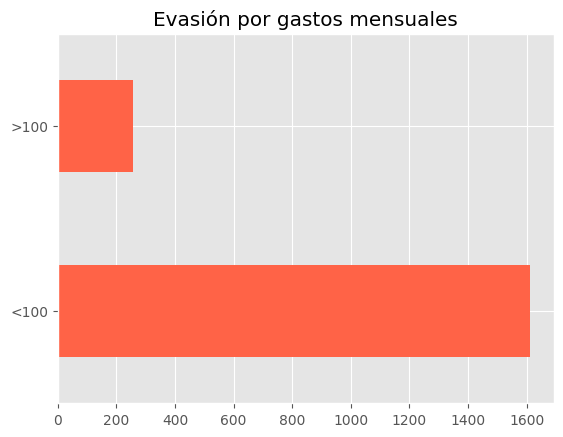

In [ ]:
evasion_mensual.plot(kind='barh',color='tomato')
plt.title('Evasión por gastos mensuales')
plt.xlabel('')
plt.ylabel('')
plt.show()

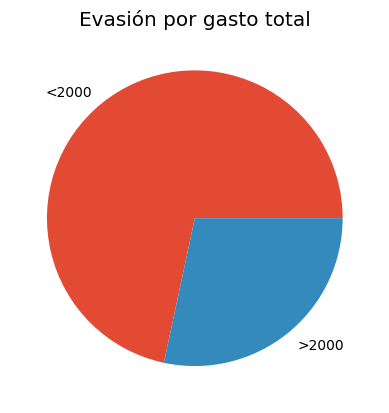

In [ ]:
evasion_total.plot(kind='pie',color='brown')
plt.title('Evasión por gasto total')
plt.xlabel('')
plt.ylabel('')
plt.show()

###**Análisis de correlación entre variables**

In [ ]:
correlacion = data.corr(method='pearson', min_periods=1, numeric_only=True)

In [ ]:
correlacion.style.background_gradient(cmap='coolwarm')

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges_monthly,Charges_total,Cuentas_diarias,evasion_por_genero,evasion_contrato,evasion_metodo_pago,evasion_citizen,evasion_partner,evasion_dependents,evasion_phoneservice,evasion_internet_service,evasion_suscripcion,evasion_tiempo,evasion_mensual,evasion_gasto_total
Churn,1.000000,0.146400,-0.148106,-0.160347,-0.345799,0.012337,0.186309,0.189393,-0.194440,0.189393,0.009494,0.397733,0.295477,-0.146400,0.148106,0.160347,0.012337,0.314487,0.072440,0.310566,-0.012970,0.145592
SeniorCitizen,0.146400,1.000000,0.023439,-0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,0.220098,0.004239,0.138010,0.163952,-1.000000,-0.023439,0.212338,0.009885,0.264705,0.128643,-0.022760,-0.101201,-0.112829
Partner,-0.148106,0.023439,1.000000,0.448500,0.379684,0.019496,-0.010303,0.098064,0.316918,0.098064,0.004593,-0.281601,-0.087453,-0.023439,-1.000000,-0.448500,0.019496,0.003115,0.107093,-0.298650,-0.110245,-0.253484
Dependents,-0.160347,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.110541,-0.114345,0.063960,-0.114345,-0.011884,-0.232138,-0.150288,0.212338,-0.448500,-1.000000,-0.003212,-0.179020,-0.045778,-0.147631,0.019967,-0.033330
tenure,-0.345799,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,0.246981,-0.005936,-0.660260,-0.230040,-0.017333,-0.379684,-0.163444,0.009661,0.026075,0.262152,-0.737581,-0.311343,-0.694659
PhoneService,0.012337,0.009885,0.019496,-0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,0.247323,0.006065,-0.002885,0.004620,-0.009885,-0.019496,0.003212,1.000000,0.193468,-0.094489,-0.006700,-0.126865,-0.049728
PaperlessBilling,0.186309,0.157470,-0.010303,-0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,0.353503,0.011417,0.169645,0.199413,-0.157470,0.010303,0.110541,0.013804,0.365684,0.246611,-0.005901,-0.155590,-0.162727
Charges_monthly,0.189393,0.220098,0.098064,-0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,1.000000,0.013126,0.061093,0.255733,-0.220098,-0.098064,0.114345,0.247323,0.875855,0.646636,-0.186167,-0.537332,-0.604192
Charges_total,-0.194440,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,0.652109,-0.000488,-0.451553,-0.079117,-0.103499,-0.316918,-0.063960,0.113791,0.409621,0.437957,-0.576738,-0.566388,-0.849765
Cuentas_diarias,0.189393,0.220098,0.098064,-0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,1.000000,0.013126,0.061093,0.255733,-0.220098,-0.098064,0.114345,0.247323,0.875855,0.646636,-0.186167,-0.537332,-0.604192
